In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [122]:
V_City_df=pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
V_City_df

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40


In [123]:
x1=V_City_df['User ID']
x2=V_City_df['Fan Challenges Completed']
x3=V_City_df['Predictive Accuracy (%)']
x4=V_City_df['Virtual Merchandise Purchases']
x5=V_City_df['Sponsorship Interactions (Ad Clicks)']
x6=V_City_df['Time on Live 360 (mins)']
x7=V_City_df['Real-Time Chat Activity (Messages Sent)']



In [124]:
#Virtual Merchandise Purchases

X = np.array([x2,x3,x5,x6,x7]).T  #<-- reshape to an array of points

w = x4

# use sklearn tools for regression
regression = LinearRegression()  # create object for the class
regression.fit(X,w)  # perform linear regression
model = regression.predict(X)  # make predictions

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,w))
#print('residuals \n',w-model)

#including all variables could give you a different result than including just 1 variable
#higher R^2 value means better predicting power

coefficients 	 [ 0.12406006  0.00542219  0.02985019 -0.00013911 -0.00938122]
intercept 	 1.5389749901744378
R^2 value 	 0.03723833366537599


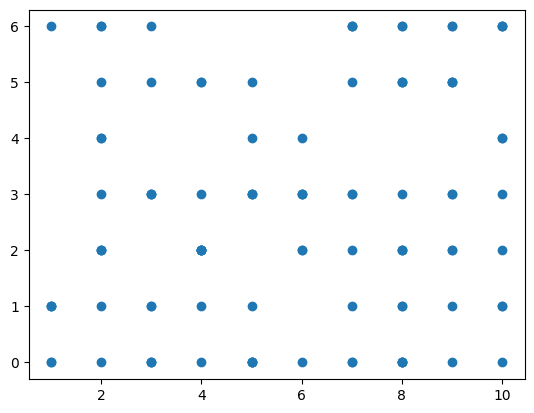

In [63]:
plt.scatter(x2, w)
#plt.title("Predictive Accuracy (%) vs. Virtual Merchandise Purchases")
#plt.xlabel("Predictive Accuracy (%)")
#plt.ylabel("Virtual Merchandise Purchases")

In [125]:
#Sponsorship Interactions (Ad Clicks)


E = np.array([x2,x3,x4,x6,x7]).T  #<-- reshape to an array of points

y = x5

# use sklearn tools for regression
regression = LinearRegression()  # create object for the class
regression.fit(E,y)  # perform linear regression
model = regression.predict(E)  # make predictions

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(E,y))
#print('residuals \n',w-model)

#including all variables could give you a different result than including just 1 variable
#higher R^2 value means better predicting power

coefficients 	 [-0.16884007  0.0239857   0.2750817  -0.0147364   0.08916026]
intercept 	 6.797116468347591
R^2 value 	 0.058972949551052145


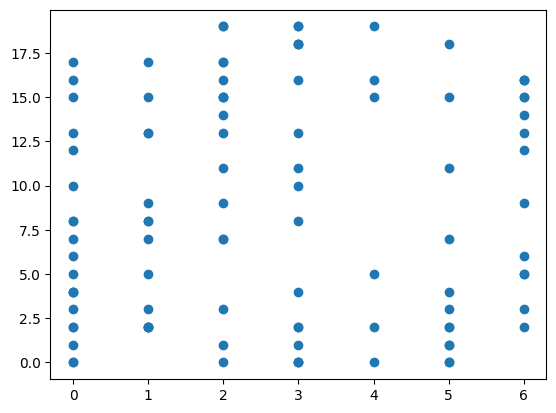

In [61]:
plt.scatter(x4, y)

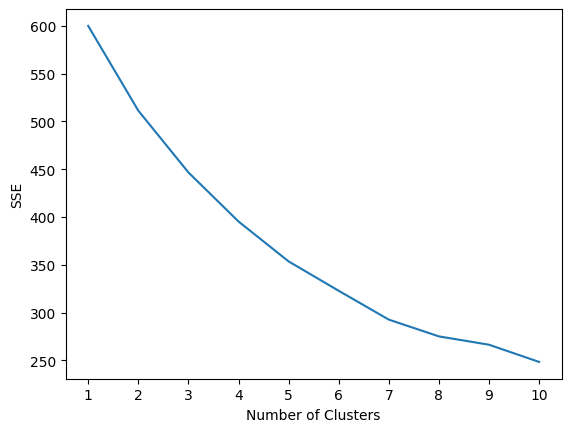

In [126]:
column_names=V_City_df.columns
reduired_indices=[1,2,3,4,5,6]
reuired_columns=[column_names[index] for index in reduired_indices]
columns=V_City_df[reuired_columns]

V_City_df2 = columns.dropna()

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(V_City_df2)

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [127]:
kmeans = KMeans(init="random", n_clusters=7, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(V_City_df2)

#view cluster assignments for each observation
kmeans.labels_

V_City_df['cluster'] = kmeans.labels_

#view updated DataFrame
#print(V_City_df)

In [156]:
ex=V_City_df[V_City_df['cluster']==1]
ex

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),cluster
2,U003,3,90,0,6,90,5,1
13,U014,5,91,0,15,98,33,1
14,U015,7,88,3,11,85,30,1
21,U022,8,83,5,15,95,3,1
22,U023,8,82,6,15,79,15,1
29,U030,2,89,2,7,91,26,1
52,U053,10,88,6,6,106,1,1
62,U063,4,92,0,12,78,25,1
76,U077,4,93,2,11,93,36,1
84,U085,8,82,0,2,75,17,1


In [157]:
x1=ex['User ID']
x2=ex['Fan Challenges Completed']
x3=ex['Predictive Accuracy (%)']
x4=ex['Virtual Merchandise Purchases']
x5=ex['Sponsorship Interactions (Ad Clicks)']
x6=ex['Time on Live 360 (mins)']
x7=ex['Real-Time Chat Activity (Messages Sent)']

E = np.array([x2,x3,x5,x6,x7]).T  #<-- reshape to an array of points

y= x4 #Virtual Merchandise Purchases
#y = x5 #Sponsorship Interactions (Ad Clicks)


# use sklearn tools for regression
regression = LinearRegression()  # create object for the class
regression.fit(E,y)  # perform linear regression
model = regression.predict(E)  # make predictions

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(E,y))
#print('residuals \n',w-model)

#including all variables could give you a different result than including just 1 variable
#higher R^2 value means better predicting power

coefficients 	 [ 0.42177736 -0.24730845  0.11688312  0.11328771  0.02948827]
intercept 	 10.161069615310938
R^2 value 	 0.6142258343073796


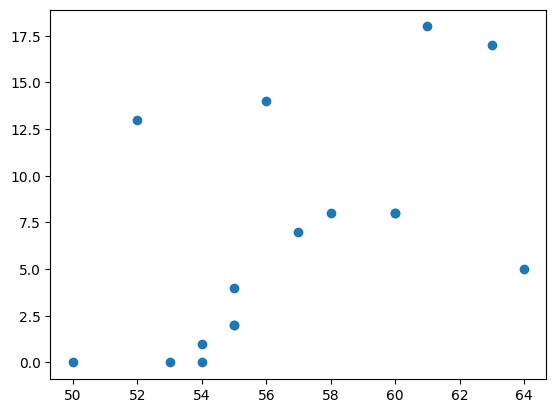

In [142]:
plt.scatter(x3, y)

In [ ]:
#y = x4, cluster =1 has r^2 of 0.61, x2 has slope 0.42
#y= x5, cluster =0 has r^2 of 0.52, x3 has slope 0.65


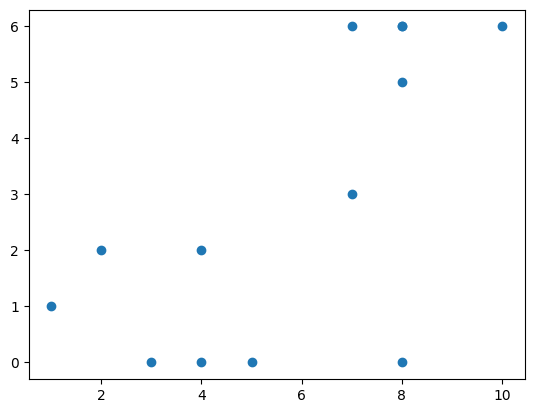

In [158]:
plt.scatter(x2, y)

In [ ]:
#Analysis
'''
There are several techniques that I used for this data set. I used regression to find any predictors on 
Virtual Merchandise Purchases and Sponsorship Interactions (Ad Clicks). Unfortuntely, I did not find a any good
predictors for these variables. The predicting power (R^2) was very mininal as it never rose above 0.1, 
which indicates that the variables had very little correlation with the dependant variable. After the bad 
results from the regression, I tried K-clustering. This technique was new to me but I learned through the 
internet. Unfortunately, this test was not succesful as well. In K-Clustering, we need to find a 'optimal K'
to find the correct number of clusters. To find this number, we do a test and plot it in a graph to find a
bend or 'elbow'. In this test with this data, there was no clear elbow, meaning that either this isn't the 
correct test because there is 1 cluster or the magnitudes for the data are too different which can be greatly
affected by the large magnitude data. I tried doing regression with k-clusters and found some results but
I'm not confident in it because of the failure of k-clustering test. When testing Virtual Merchandise Purchases
in cluster 1, there was an R^2 value of 0.61, which is decent predictive power. The variable
that had an effect on this was Fan Challenges completed. When testing Sponsorship Interactions (Ad Clicks) 
in cluster 0, there was an R^2 value of 0.52. The variable that had an effect was Predictive Accuracy (%).

Based on my results, I say that something is missing in this dataframe that we are not seeing the true behavior.
If I had to improve the company based on this data, I would give these suggestions:

1. Make the challenges easy for users to win more. This satisfaction will cause them to get themselves an award
(merchandise)

2. Promote interesting ads in the live stream and chat to engage users.

3. Have broadcasters introduce ads or challenges to intice users. Also announce winners to intice users as well.



'''